In [12]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

In [13]:
fair_probs = torch.ones(6)/6

In [14]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [15]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 1., 2., 2., 3.])

In [16]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000           ## 相对频率作为估计值

tensor([0.1610, 0.1850, 0.1560, 0.1700, 0.1660, 0.1620])

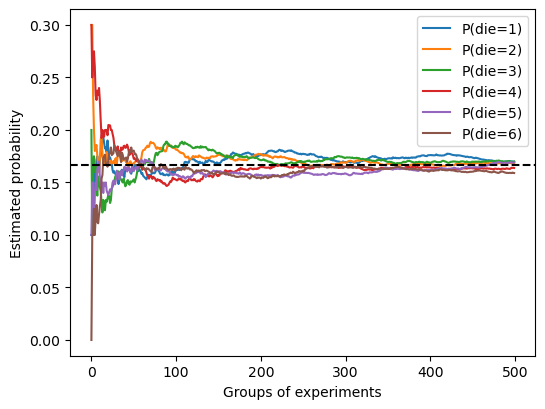

In [17]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)

plt.rcParams['figure.figsize'] = (6, 4.5)
for i in range(6):
    plt.plot(estimates[:, i].numpy(), 
                label = "P(die="+str(i+1)+")")
plt.axhline(y=0.167, color="black", linestyle="dashed")
plt.gca().set_xlabel("Groups of experiments")
plt.gca().set_ylabel("Estimated probability")
plt.legend()

## 处理多个随机变量
---